SC2008 LAB 4 SOURCE CODE
<br> Ng Zi En Chloe

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import plotly.express as px
from ipwhois import IPWhois

# Given SFlow Format in Table 1 (column names)
format = ['Type', 'sflow_agent_address', 'inputPort', 'outputPort',
               'src_MAC', 'dst_MAC', 'ethernet_type', 'in_vlan', 'out_vlan',
               'src_IP', 'dst_IP', 'IP_protocol', 'ip_tos', 'ip_ttl',
               'src_transport_port', 'dst_transport_port', 'tcp_flags',
               'packet_size', 'IP_size', 'sampling_rate','???']


4a: top talkers and listeners
top talkers: hosts that send out large amount of data
top listeners: hosts that receive large amount of data

top talkers: hosts that send out large amount of data
<br> top listeners: hosts that receive large amount of data

In [6]:
#read the csv file
df = pd.read_csv('lab4data.csv', header = None ,names=format)
df.drop('???',axis=1,inplace=True)
df.head(10)

,Type,sflow_agent_address,inputPort,outputPort,src_MAC,dst_MAC,ethernet_type,in_vlan,out_vlan,src_IP,dst_IP,IP_protocol,ip_tos,ip_ttl,src_transport_port,dst_transport_port,tcp_flags,packet_size,IP_size,sampling_rate
0,FLOW,203.30.38.251,137,200,d404ff55fd4d,80711fc76001,0x0800,919,280,130.246.176.22,140.115.32.81,6,0x00,50,51216,23505,0x10,1518,1500,2048
1,FLOW,203.30.38.251,129,193,609c9f851b00,0031466b23cf,0x0800,11,919,155.69.160.32,64.233.188.128,6,0x00,56,23159,80,0x10,74,52,2048
2,FLOW,203.30.38.251,137,200,d404ff55fd4d,80711fc76001,0x0800,919,280,130.246.176.53,140.115.32.83,6,0x00,50,50041,20739,0x10,1518,1500,2048
3,FLOW,203.30.38.251,129,135,609c9f851b00,002688cd5fc7,0x0800,11,919,155.69.160.32,54.169.174.79,17,0x00,120,54241,26510,0x10,116,94,2048
4,FLOW,203.30.38.251,130,199,00239cd087c1,544b8cf9a7df,0x0800,919,600,137.132.228.15,193.62.192.8,6,0x00,56,53923,34262,0x10,70,52,2048
5,FLOW,203.30.38.251,129,135,609c9f851b00,002688cd5fc7,0x0800,11,919,155.69.160.32,54.255.221.151,17,0x00,120,55069,26509,0x10,113,91,2048
6,FLOW,203.30.38.251,130,199,00239cd087c1,544b8cf9a7df,0x0800,919,600,137.132.250.8,193.62.193.9,6,0x00,62,27419,80,0x10,58,40,2048
7,FLOW,203.30.38.251,137,200,d404ff55fd4d,80711fc76001,0x0800,919,280,193.61.196.206,140.110.147.170,6,0x00,240,443,43545,0x18,1518,1500,2048
8,FLOW,203.30.38.251,200,3,80711fc76001,00235ed9b680,0x0800,280,32,137.189.133.62,123.136.64.7,6,0x00,58,6345,34921,0x10,1342,1320,2048
9,FLOW,203.30.38.251,199,130,544b8cf9a7df,00239cd087c1,0x0800,600,919,193.62.192.8,137.132.228.15,6,0x08,55,34262,53923,0x10,1442,1420,2048


In [4]:
#find org given ip
def find_org(ip):
    ip = IPWhois(ip)
    result = ip.lookup_rdap()
    return result.get('network', {}).get('name')

In [15]:
#top 5 unique talkers (ip,no. of packets, org)
top_talkers = df['src_IP'].value_counts().head(5)
org = []
for ip in top_talkers.index:
    org.append(find_org(ip))
top_talkers_df = pd.DataFrame({'IP': top_talkers.index, 'Packets': top_talkers.values, 'Org': org})
top_talkers_df.reset_index(drop=True, inplace=True)
top_talkers_df.columns = ['IP Address', 'No. of Packets', 'Organisation']
top_talkers_df

,IP Address,No. of Packets,Organisation
0,193.62.192.8,3041,EUR-BIO-INST
1,155.69.160.32,2975,NTUNET1
2,130.14.250.11,2604,NLM-ETHER
3,14.139.196.58,2452,NKN-IIT-GUW
4,140.112.8.139,2056,T-NTU.EDU.TW-NET


In [16]:
#top 5 unique listeners (ip,no of packets,org)
top_listeners = df['dst_IP'].value_counts().head(5)
org = []
for ip in top_listeners.index:
    org.append(find_org(ip))
top_listeners_df = pd.DataFrame({'IP': top_listeners.index, 'Packets': top_listeners.values, 'Org': org})
top_listeners_df.reset_index(drop=True, inplace=True)
top_listeners_df.columns = ['IP', 'No. of Packets', 'Organisation']
top_listeners_df

,IP,No. of Packets,Organisation
0,103.37.198.100,3841,A-STAR-AS-AP
1,137.132.228.15,3715,NUSNET
2,202.21.159.244,2446,RPNET
3,192.101.107.153,2368,PNNL
4,103.21.126.2,2056,IITB-IN


4b: transport protocol (% of tcp & udp protocol)

In [14]:
packetdf = df['IP_protocol'].value_counts().head(5)
#packetdf = packetdf.reset_index().rename(columns={'index':'Header Value',
#                                                    'IP_protocol':'No. of Packets'})

# Create counts dataframe
packetdf = df['IP_protocol'].value_counts().reset_index()
packetdf.columns = ['Header value', 'No. of Packets']

# Calculate percentage
packetdf['Percentage of Packets'] = packetdf['No. of Packets'] * 100 / len(df)

# Filter for TCP (6) and UDP (17)
finaldf = packetdf[packetdf['Header value'].isin([6, 17])]

print(packetdf)

   Header value  No. of Packets  Percentage of Packets
0             6           56064              80.818798
1            17            9462              13.639902
2            50            1698               2.447744
3             0            1261               1.817789
4            47             657               0.947095
5            41             104               0.149921
6             1              74               0.106674
7           381              45               0.064870
8            58               4               0.005766
9           103               1               0.001442


4c: applications protocol

In [12]:
dest_port_df = df['dst_transport_port'].value_counts().nlargest(5).reset_index()
dest_port_df.columns = ['Destination Port', 'No. of Packets']

port_mapping = {45512: 'Unassigned', 
                443: 'HTTPS',
                80: 'HTTP',
                52866: 'Dynamic/Private Ports',
                56152: 'Dynamic/Private Ports',
                0: 'Reserved Port'}
service = []

# Assign service names (default to 'Unknown' if not in mapping)
for i in dest_port_df['Destination Port']:
    service.append(port_mapping.get(i, 'Unknown'))

dest_port_df['Service'] = service
dest_port_df

,Destination Port,No. of Packets,Service
0,443,13423,HTTPS
1,80,2647,HTTP
2,52866,2068,Dynamic/Private Ports
3,45512,1356,Unassigned
4,56152,1341,Dynamic/Private Ports


4d: traffic

In [30]:
traffic = sum(df['IP_size']*df['sampling_rate']) #in bytes
# 1 byte = 8 bits
trafficMb = traffic / pow(2,20)
print(f"Total Traffic (Mb) = {trafficMb:.3f} Mb")

Total Traffic (Mb) = 126519.184 Mb


4e: additional analysis
<br>
<br> top5 unique communication pairs
<br> visualisation of communications between different ip hosts

In [22]:
#top 5 unique communication pairs
commdf = df.groupby(['src_IP', 'dst_IP']).size().reset_index(name='No. of Packets')
commdf = commdf.nlargest(5, 'No. of Packets')
commdf = commdf.rename(columns={
    "src_IP": "Source IP",
    "dst_IP": "Destination IP"
})
commdf.reset_index(drop=True, inplace=True)
commdf['Source Org'] = commdf['Source IP'].apply(find_org)
commdf['Destination Org'] = commdf['Destination IP'].apply(find_org)
commdf = commdf.rename(columns={
    "Source Org": "Source Organization",
    "Destination Org": "Destination Organization"
})
commdf = commdf[['Source IP', 'Source Organization', 'Destination IP', 'Destination Organization', 'No. of Packets']]
commdf

,Source IP,Source Organization,Destination IP,Destination Organization,No. of Packets
0,193.62.192.8,EUR-BIO-INST,137.132.228.15,NUSNET,3041
1,130.14.250.11,NLM-ETHER,103.37.198.100,A-STAR-AS-AP,2599
2,14.139.196.58,NKN-IIT-GUW,192.101.107.153,PNNL,2368
3,140.112.8.139,T-NTU.EDU.TW-NET,103.21.126.2,IITB-IN,2056
4,137.132.228.15,NUSNET,193.62.192.8,EUR-BIO-INST,1910


In [33]:
#get pairs
pairs = df.value_counts(subset=['src_IP', 'dst_IP']).nlargest(5).to_frame()
pairs.reset_index(inplace=True)
pairs.rename(columns={"count": "No. of Packets"}, inplace=True)
pairs

,src_IP,dst_IP,No. of Packets
0,193.62.192.8,137.132.228.15,3041
1,130.14.250.11,103.37.198.100,2599
2,14.139.196.58,192.101.107.153,2368
3,140.112.8.139,103.21.126.2,2056
4,137.132.228.15,193.62.192.8,1910


In [34]:
#create graph
G = nx.Graph()

edges = set()
nodes = set()

sc = pairs['src_IP']
dest = pairs['dst_IP']

for i in range(len(pairs)):
    nodes.add(sc[i])
    nodes.add(dest[i])
    edges.add((sc[i], dest[i]))


<Figure size 640x480 with 0 Axes>

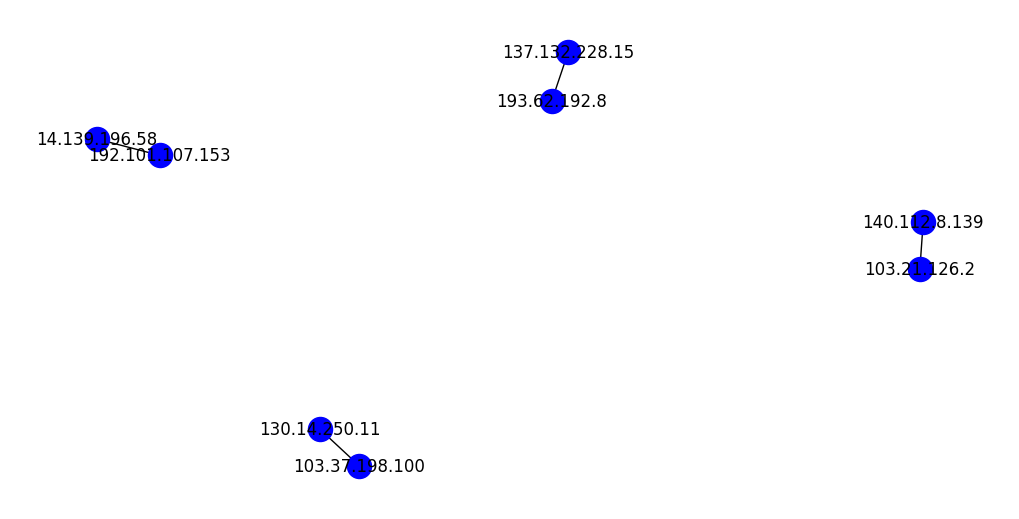

In [35]:
G.add_nodes_from(nodes)
G.add_edges_from(edges)

f = plt.figure()
plt.figure(figsize=(10, 5))

nx.draw(G,node_color = 'b',edge_color = 'black', with_labels = True)

plt.show()